In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip /content/dataset.zip -d /content/dataset

Archive:  /content/dataset.zip
   creating: /content/dataset/images/
  inflating: /content/dataset/images/148.jpg  
  inflating: /content/dataset/images/18.jpg  
  inflating: /content/dataset/images/captured_car_1019.jpg  
  inflating: /content/dataset/images/captured_car_102.jpg  
  inflating: /content/dataset/images/captured_car_1020.jpg  
  inflating: /content/dataset/images/captured_car_1032.jpg  
  inflating: /content/dataset/images/captured_car_1037.jpg  
  inflating: /content/dataset/images/captured_car_1040.jpg  
  inflating: /content/dataset/images/captured_car_1058.jpg  
  inflating: /content/dataset/images/captured_car_1063.jpg  
  inflating: /content/dataset/images/captured_car_1119.jpg  
  inflating: /content/dataset/images/captured_car_1124.jpg  
  inflating: /content/dataset/images/captured_car_1141.jpg  
  inflating: /content/dataset/images/captured_car_1164.jpg  
  inflating: /content/dataset/images/captured_car_1168.jpg  
  inflating: /content/dataset/images/captured_

In [ ]:
import glob
import shutil
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [ ]:
image_folder = '/content/dataset/images'
label_folder = '/content/dataset/labels'

image_files = os.listdir(image_folder)
label_files = os.listdir(label_folder)

for image_file in image_files:
    label_file = image_file.replace('.jpg', '.txt')
    if label_file not in label_files:
        open(os.path.join(label_folder, label_file), 'w').close()

In [ ]:
def count_files(dir):
  patt = dir + '/*'
  files = glob.glob(patt)
  return len(files)

print(count_files('/content/dataset/images'))

314


In [ ]:
print(count_files('/content/dataset/labels'))

314


In [ ]:
def move_images_and_labels(source_dir, dest_dir, num_images):
    os.makedirs(dest_dir, exist_ok=True)
    os.makedirs(os.path.join(dest_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dest_dir, 'labels'), exist_ok=True)

    files = os.listdir(os.path.join(source_dir, 'images'))
    num_images_to_move = min(num_images, len(files))

    for file in files[:num_images_to_move]:
        shutil.move(os.path.join(source_dir, 'images', file), os.path.join(dest_dir, 'images'))
        label_file_name = os.path.splitext(file)[0] + '.txt'
        shutil.move(os.path.join(source_dir, 'labels', label_file_name), os.path.join(dest_dir, 'labels'))

source_directory = "/content/dataset/train"
destination_directory = "/content/dataset/val"
num_images_to_move = 14

move_images_and_labels(source_directory, destination_directory, num_images_to_move)

In [ ]:
print(count_files('/content/dataset/train/images'))

300


In [ ]:
print(count_files('/content/dataset/train/labels'))

300


In [ ]:
print(count_files('/content/dataset/val/images'))

14


In [ ]:
print(count_files('/content/dataset/val/labels'))

14


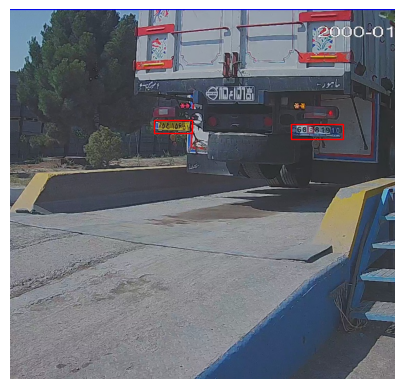

In [ ]:
def show_data(images_dir, labels_dir):
    image_files = os.listdir(images_dir)
    random_image = random.choice(image_files)
    img_path = os.path.join(images_dir, random_image)
    img = cv2.imread(img_path)
    height, width, _ = img.shape

    label_file = os.path.splitext(random_image)[0] + '.txt'
    label_path = os.path.join(labels_dir, label_file)

    with open(label_path, 'r') as f:
        for line in f:
            values = [float(x) for x in line.split()]
            x, y, w, h = values[1] * width, values[2] * height, values[3] * width, values[4] * height
            x1, y1 = x - w / 2, y - h / 2
            rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.gca().add_patch(rect)

    plt.axis('off')
    plt.show()

images_directory = "/content/dataset/images"
labels_directory = "/content/dataset/labels"
show_data(images_directory, labels_directory)

In [ ]:
# images_directory = "/content/dataset/val/images"
# labels_directory = "/content/dataset/val/labels"
# show_data(images_directory, labels_directory)

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.0/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/content/dd.yml' epochs=10 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 240MB/s]
New https://pypi.org/project/ultralytics/8.2.50 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dd.yml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=Non

In [ ]:
!pip install shutil
import shutil
file_to_copy = '/content/runs/detect/train/weights/best.pt'
destination_directory = '/content/drive/MyDrive/v8Model'
shutil.copy(file_to_copy, destination_directory)

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


'/content/drive/MyDrive/v8Model/best.pt'

In [ ]:
#YOLOV5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16800, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 16800 (delta 185), reused 181 (delta 95), pack-reused 16459
Receiving objects: 100% (16800/16800), 15.58 MiB | 28.44 MiB/s, done.
Resolving deltas: 100% (11488/11488), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into acco

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/dataset"

In [ ]:
# !pip install -U yolov5
# !python train.py --img 416 --batch 16 --epochs 150 --data {'/content/dataset'}/dataset.yaml --weights yolov5s.pt --cache
!yolov5 train --data /content/dd.yml --img 640 --batch 16 yolov5m.pt --epochs 30

2024-07-18 07:16:24.249033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 07:16:24.249083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 07:16:24.250387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/dd.yml, hyp=../../usr/local/lib/python3.10/dist-packages/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fal